In [4]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
tech_data= pd.read_csv(r'C:\Users\kavle\Downloads\technology_trends.csv')

In [17]:
tech_data.head()

,Year,Technology,Category,Popularity_Index,Growth_Rate,Usage,Market_Share,Region,Industry,Comments
0,2022,Ruby,Database,50.547302,-7.438251,820124,27.472300,North America,Healthcare,NaN
1,2015,C++,IDE,84.864839,-7.857924,665254,41.572720,North America,IT,NaN
2,2010,Go,Framework,80.956637,-1.947107,275232,17.832272,South America,Education,NaN
3,2013,Rust,Framework,0.977752,3.839811,53486,46.927723,South America,Healthcare,NaN
4,2021,Ruby,Language,15.537119,-4.996349,873113,3.321825,Asia,Finance,NaN


In [14]:
tech_data.shape

(3000, 10)

In [20]:
tech_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              3000 non-null   int64  
 1   Technology        3000 non-null   object 
 2   Category          3000 non-null   object 
 3   Popularity_Index  3000 non-null   float64
 4   Growth_Rate       3000 non-null   float64
 5   Usage             3000 non-null   int64  
 6   Market_Share      3000 non-null   float64
 7   Region            3000 non-null   object 
 8   Industry          3000 non-null   object 
 9   Comments          0 non-null      float64
dtypes: float64(4), int64(2), object(4)
memory usage: 234.5+ KB


In [21]:
tech_data.describe(include="all")

,Year,Technology,Category,Popularity_Index,Growth_Rate,Usage,Market_Share,Region,Industry,Comments
count,3000.000000,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000,0.0
unique,NaN,10,8,NaN,NaN,NaN,NaN,5,5,NaN
top,NaN,C++,Tool,NaN,NaN,NaN,NaN,Africa,Education,NaN
freq,NaN,329,628,NaN,NaN,NaN,NaN,616,628,NaN
mean,2015.993333,NaN,NaN,50.300724,0.130376,495705.509667,25.078948,NaN,NaN,NaN
std,3.748774,NaN,NaN,28.952742,5.727954,285066.826091,14.522436,NaN,NaN,NaN
min,2010.000000,NaN,NaN,0.018671,-9.999599,1597.000000,0.001629,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,25.270949,-4.734733,255163.750000,12.507861,NaN,NaN,NaN
50%,2016.000000,NaN,NaN,50.648571,0.174553,494828.000000,24.749080,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,75.997921,5.119626,741175.000000,37.873498,NaN,NaN,NaN


In [23]:
# Check missing values
print(tech_data.isna().sum())

Year                   0
Technology             0
Category               0
Popularity_Index       0
Growth_Rate            0
Usage                  0
Market_Share           0
Region                 0
Industry               0
Comments            3000
dtype: int64


#### Handle missing values (Popularity_Index, Growth_Rate, Market_Share) : No missing values for these

In [26]:
#convert year to datetime
tech_data['Year'] = pd.to_datetime(tech_data['Year'], format='%Y')
tech_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year              3000 non-null   datetime64[ns]
 1   Technology        3000 non-null   object        
 2   Category          3000 non-null   object        
 3   Popularity_Index  3000 non-null   float64       
 4   Growth_Rate       3000 non-null   float64       
 5   Usage             3000 non-null   int64         
 6   Market_Share      3000 non-null   float64       
 7   Region            3000 non-null   object        
 8   Industry          3000 non-null   object        
 9   Comments          0 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 234.5+ KB


In [27]:
# One-Hot Encoding for all categorical columns
tech_data = pd.get_dummies( tech_data,columns=['Technology', 'Category', 'Region', 'Industry'], drop_first=True ) # to avoid dummy variable trap
print("Shape after one-hot encoding:", tech_data.shape)


Shape after one-hot encoding: (3000, 30)


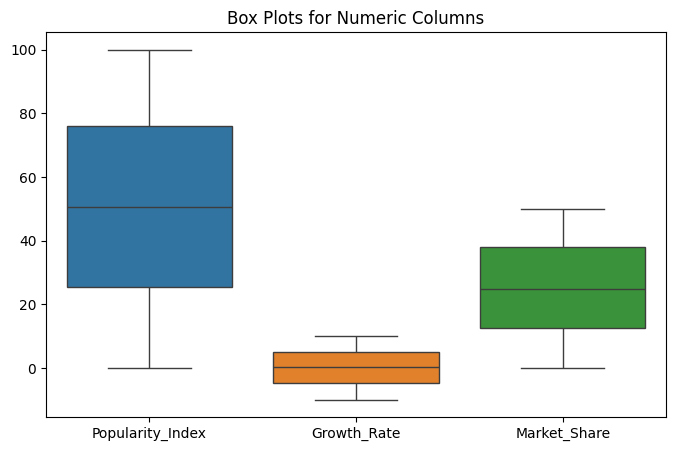

In [28]:
#outlier check
numeric_cols = ['Popularity_Index', 'Growth_Rate', 'Market_Share']

plt.figure(figsize=(8,5))
sns.boxplot(data=tech_data[numeric_cols])
plt.title("Box Plots for Numeric Columns")
plt.show()

#### no outliers detected

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tech_data[['Popularity_Index', 'Market_Share']] = scaler.fit_transform(tech_data[['Popularity_Index', 'Market_Share']])


## Phase 3: Exploratory Data Analysis (EDA)

#### Univariate Analysis

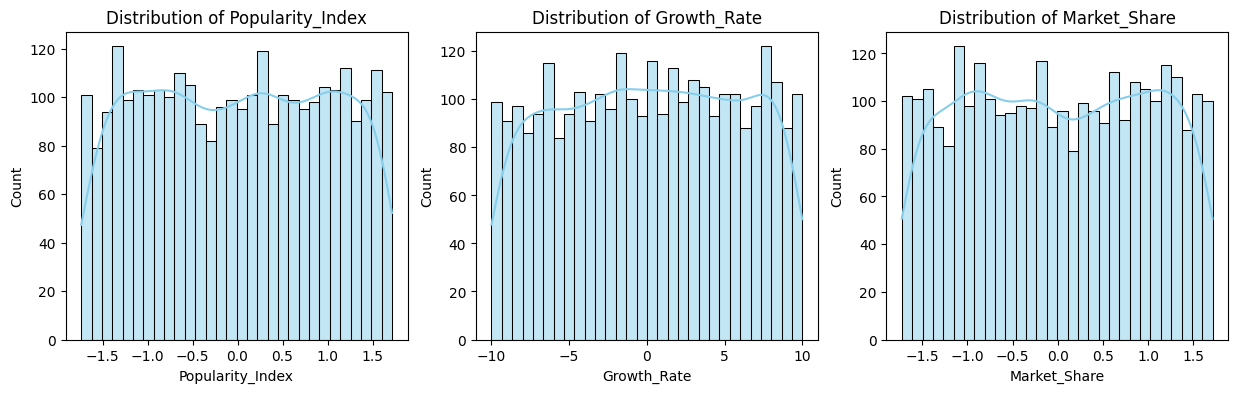

In [35]:

plt.figure(figsize=(15, 4))

for i, col in enumerate(numeric_cols, 1):   #using for loop to generate graph for each numeric column
    plt.subplot(1, 3, i)        #creating 1x3 grid of plots
    sns.histplot(tech_data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.show()


In [33]:
print(tech_data[numeric_cols].skew())

Popularity_Index   -0.001842
Growth_Rate        -0.029774
Market_Share       -0.004521
dtype: float64


In [34]:
### since all three values are close to zero, the numeric columns of tech_data are essentially symmetric

#### Bivariate Analysis

                  Popularity_Index  Growth_Rate  Market_Share
Popularity_Index          1.000000     0.007200      0.001296
Growth_Rate               0.007200     1.000000     -0.000189
Market_Share              0.001296    -0.000189      1.000000


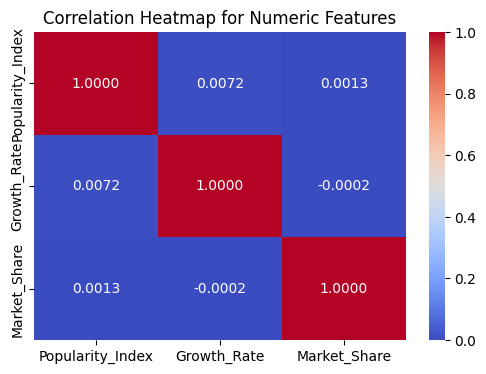

In [39]:
# correlation heatmap for numeric columns
# correlation matrix
corr_matrix = tech_data[numeric_cols].corr()
print(corr_matrix)

# Plotting heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

In [38]:
#no correlation across numeric features

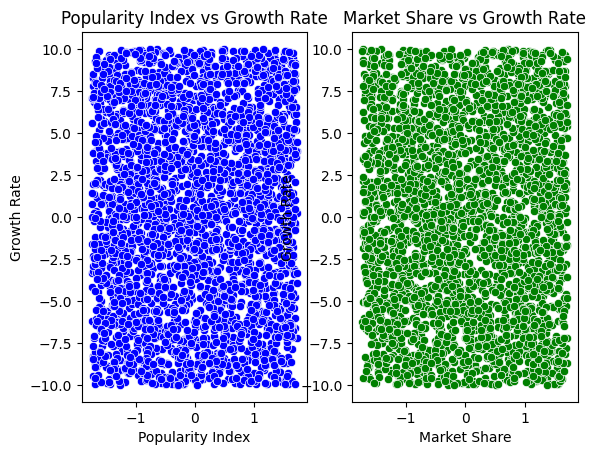

In [42]:
## scatterplots
# Popularity_Index vs Growth_Rate
plt.subplot(1, 2, 1)
sns.scatterplot(x='Popularity_Index', y='Growth_Rate', data=tech_data, color='blue')
plt.title('Popularity Index vs Growth Rate')
plt.xlabel('Popularity Index')
plt.ylabel('Growth Rate')

# Market_Share vs Growth_Rate
plt.subplot(1, 2, 2)
sns.scatterplot(x='Market_Share', y='Growth_Rate', data=tech_data, color='green')
plt.title('Market Share vs Growth Rate')
plt.xlabel('Market Share')
plt.ylabel('Growth Rate')

plt.show()

In [12]:
tech_data_copy= pd.read_csv(r'C:\Users\kavle\Downloads\technology_trends.csv')

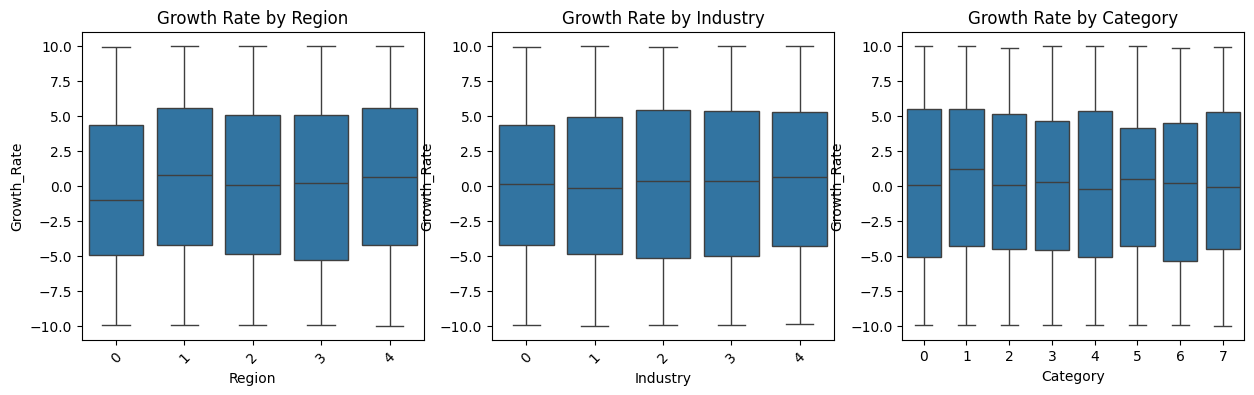

In [40]:
#boxplots of growth_rate across region, industry and category
plt.figure(figsize=(15,4))

# Growth Rate by Region
plt.subplot(1, 3, 1)
sns.boxplot(x ='Region', y='Growth_Rate', data=tech_data_copy)
plt.title('Growth Rate by Region')
plt.xticks(rotation=45)

# Growth Rate by Industry
plt.subplot(1, 3, 2)
sns.boxplot(x='Industry', y='Growth_Rate', data=tech_data_copy)
plt.title('Growth Rate by Industry')
plt.xticks(rotation=45)

# Growth Rate by Category
plt.subplot(1, 3, 3)
sns.boxplot(x='Category', y='Growth_Rate', data=tech_data_copy)
plt.title('Growth Rate by Category')



plt.show()

In [50]:
## Africa has the lowest median groth rate as compared to other regions
## Growth rate in education industry shows relatively less variability
## high overlap for growth rate across region, category and industry shows that differences in growth at each of these levels may not be significant

## Phase 4: Feature Engineering

In [10]:

# Growth_Category using growth_rate quantiles
quantiles = tech_data['Growth_Rate'].quantile([0.33, 0.66])
low_threshold = quantiles[0.33]
high_threshold = quantiles[0.66]

def categorize(rate):
    if rate <= low_threshold:
        return 'Low'
    elif rate <= high_threshold:
        return 'Medium'
    else:
        return 'High'

tech_data['Growth_Category'] = tech_data['Growth_Rate'].apply(categorize)

# Popularity_to_Market_Ratio
tech_data['Popularity_to_Market_Ratio'] = tech_data['Popularity_Index'] / tech_data['Market_Share']



In [52]:
print(tech_data[numeric_cols].skew())

Popularity_Index   -0.001842
Growth_Rate        -0.029774
Market_Share       -0.004521
dtype: float64


In [53]:
#no skewness

 ### Phase 5: Model Building

In [6]:
#train and test split
from sklearn.model_selection import train_test_split

# Features and target
X = tech_data[['Popularity_Index', 'Market_Share']] 
y = tech_data['Growth_Rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### linear regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Train model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_lin_reg = linear_reg.predict(X_test)

# Evaluation Metrics
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
rmse_lin_reg = np.sqrt(mean_squared_error(y_test, y_pred_lin_reg))
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)

print(f"Linear Regression — R²: {r2_lin_reg:.3f}, RMSE: {rmse_lin_reg:.3f}, MAE: {mae_lin_reg:.3f}")


Linear Regression — R²: -0.001, RMSE: 5.879, MAE: 5.123


#### XG Boost

In [9]:
from xgboost import XGBRegressor

xg_boost = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xg_boost.fit(X_train, y_train)
y_pred_xg_boost = xg_boost.predict(X_test)

r2_xg_boost = r2_score(y_test, y_pred_xg_boost)
rmse_xg_boost = np.sqrt(mean_squared_error(y_test, y_pred_xg_boost))
mae_xg_boost = mean_absolute_error(y_test, y_pred_xg_boost)

print(f"XGBoost — R²: {r2_xg_boost:.3f}, RMSE: {rmse_xg_boost:.3f}, MAE: {mae_xg_boost:.3f}")


XGBoost — R²: -0.107, RMSE: 6.183, MAE: 5.232


#### both models are performing poorly. R2 is negative that means the predictors are worse at predicting growth rate. RMSE and MAE is high for both.

In [32]:
## adding more predictors.
from sklearn.preprocessing import LabelEncoder

# Derived features
tech_data_copy['Popularity_to_Market_Ratio'] = tech_data_copy['Popularity_Index'] / tech_data_copy['Market_Share']
tech_data_copy['Growth_Category'] = tech_data_copy['Growth_Rate'].apply(categorize)

# Encoding categorical columns
label_enc = LabelEncoder()
for col in ['Region', 'Industry', 'Category', 'Technology']:
    tech_data_copy[col] = label_enc.fit_transform(tech_data_copy[col])



In [34]:
from sklearn.model_selection import train_test_split
# Features and target
X = tech_data_copy[['Popularity_Index', 'Market_Share', 'Region', 'Industry', 'Category', 'Popularity_to_Market_Ratio', 'Technology','Usage']]
y = tech_data_copy['Growth_Rate']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Train model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_lin_reg = linear_reg.predict(X_test)

# Evaluation Metrics
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
rmse_lin_reg = np.sqrt(mean_squared_error(y_test, y_pred_lin_reg))
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)

print(f"Linear Regression — R²: {r2_lin_reg:.3f}, RMSE: {rmse_lin_reg:.3f}, MAE: {mae_lin_reg:.3f}")


Linear Regression — R²: -0.010, RMSE: 5.905, MAE: 5.135


#### No improvement

In [36]:
from xgboost import XGBRegressor

xg_boost = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xg_boost.fit(X_train, y_train)
y_pred_xg_boost = xg_boost.predict(X_test)

r2_xg_boost = r2_score(y_test, y_pred_xg_boost)
rmse_xg_boost = np.sqrt(mean_squared_error(y_test, y_pred_xg_boost))
mae_xg_boost = mean_absolute_error(y_test, y_pred_xg_boost)

print(f"XGBoost — R²: {r2_xg_boost:.3f}, RMSE: {rmse_xg_boost:.3f}, MAE: {mae_xg_boost:.3f}")

XGBoost — R²: -0.079, RMSE: 6.105, MAE: 5.195


#### market share has slightly higher importance than popularity index based on gain

<Figure size 1000x600 with 0 Axes>

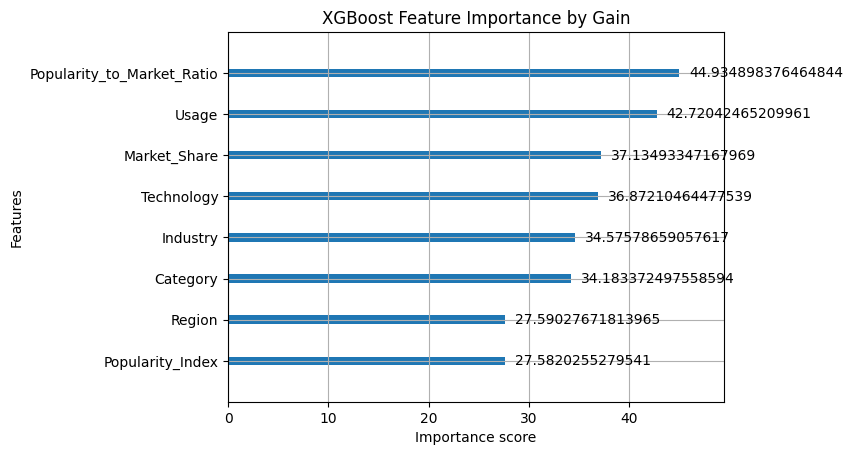

In [37]:

from xgboost import plot_importance

# Feature Importance Plot 
plt.figure(figsize=(10, 6))
plot_importance(xg_boost, importance_type='gain', max_num_features=10)  # top 10
plt.title("XGBoost Feature Importance by Gain")
plt.show()


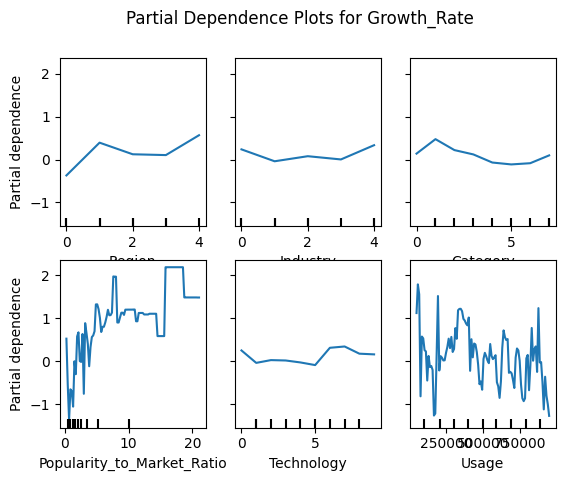

In [39]:
from sklearn.inspection import PartialDependenceDisplay
features_to_plot = ['Region', 'Industry', 'Category',  'Popularity_to_Market_Ratio', 'Technology','Usage']

# PDPs
PartialDependenceDisplay.from_estimator(xg_boost, X_train, features_to_plot)
plt.suptitle("Partial Dependence Plots for Growth_Rate")
plt.show()
